In [13]:
XGB_PARAMS = {
        'n_estimators': 281,
        'max_depth': 9,
        'learning_rate': 0.017957138799569422,
        'subsample': 0.9475936609928898,
        'colsample_bytree': 0.9593180704193125,
        'random_state': 42
    }


GB_PARAMS = {
        'n_estimators': 33,
        'max_depth': 3,
        'learning_rate': 0.10653740408400243,
        'subsample': 0.9991709860605422,
        'random_state': 42
    }

RF_PARAMS = {
        'n_estimators': 41, 
        'max_depth': 30, 
        'min_samples_split': 2, 
        'min_samples_leaf': 1, 
        'criterion': 'entropy',
        'random_state': 42
    }

DATA_PATH = "../data/preprocessed/feature_engineered_data.csv"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import shap

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
data = pd.read_csv(DATA_PATH)
scaler = StandardScaler()
rus = RandomOverSampler(random_state=42)
num_kolom = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_kolom += ["NLR", "PLR", "MLR", "NMR", "NPR", "LMR", "red2white"]

num_kolom.remove("infection_group")

data.head()

,infection_group,"age, months",who_score,sex,"height, m","weight, kg","wbc, 10^6/L","neutrophils, 10^6/L","lymphocytes, 10^6/L","monocytes, 10^6/L",...,days_past_onset,rotavirus vaccine doses,NLR,PLR,MLR,NMR,NPR,LMR,red2white,age_group
0,1,12,1,0,0.81,10.3,21890,17380,2070,1160,...,1.0,2,8.396135,132.367150,0.560386,14.982759,0.063431,1.784483,0.000186,1
1,1,24,1,1,0.84,12.9,23900,11980,6790,4900,...,5.0,1,1.764359,50.073638,0.721649,2.444898,0.035235,1.385714,0.000125,3
2,1,24,3,0,0.82,5.8,12600,8830,2710,860,...,3.0,0,3.258303,170.110701,0.317343,10.267442,0.019154,3.151163,0.000345,3
3,1,6,1,1,0.62,6.0,15030,6840,6600,1230,...,1.0,0,1.036364,54.696970,0.186364,5.560976,0.018947,5.365854,0.000251,1
4,1,11,1,1,0.72,8.0,17350,8880,6250,1560,...,2.0,0,1.420800,82.880000,0.249600,5.692308,0.017143,4.006410,0.000259,1


In [75]:
X, y = data.drop(["infection_group"], axis=1), data["infection_group"]

X[num_kolom] = scaler.fit_transform(X[num_kolom])
X, y = rus.fit_resample(X, y)

X.head()

,"age, months",who_score,sex,"height, m","weight, kg","wbc, 10^6/L","neutrophils, 10^6/L","lymphocytes, 10^6/L","monocytes, 10^6/L","eosinophils, 10^6/L",...,days_past_onset,rotavirus vaccine doses,NLR,PLR,MLR,NMR,NPR,LMR,red2white,age_group
0,-0.658388,-0.773223,-1.266165,-0.194956,-0.252905,1.852923,2.316029,-0.587023,0.088542,1.150635,...,-1.086105,0.735288,0.915705,-0.072387,0.304237,0.248506,2.185774,-0.415665,-1.274072,-0.915598
1,-0.156953,-0.773223,0.789786,-0.056446,0.066163,2.223343,1.138644,1.057754,5.007746,0.393616,...,1.379241,-0.164617,-0.382371,-0.673648,0.731339,-0.377274,0.649769,-0.465384,-1.613777,0.407381
2,-0.156953,2.044746,-1.266165,-0.148786,-0.805137,0.140880,0.451836,-0.364002,-0.306047,0.049517,...,0.146568,-1.064521,-0.089953,0.203380,-0.339457,0.013159,-0.226295,-0.245263,-0.384341,0.407381
3,-0.909105,-0.773223,0.789786,-1.072185,-0.780594,0.588702,0.017948,0.991545,0.180612,0.600076,...,-1.086105,-1.064521,-0.524866,-0.639869,-0.686353,-0.221747,-0.237553,0.030872,-0.911597,-0.915598
4,-0.700174,-0.773223,0.789786,-0.610485,-0.535157,1.016252,0.462738,0.869581,0.614660,1.632374,...,-0.469769,-1.064521,-0.449618,-0.433955,-0.518873,-0.215192,-0.335858,-0.138628,-0.867152,-0.915598


In [14]:
xg = xgb.XGBClassifier(**XGB_PARAMS)
gb = GradientBoostingClassifier(**GB_PARAMS)
rf = RandomForestClassifier(**RF_PARAMS)

xg.fit(X, y)
gb.fit(X, y)
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=41,
                       random_state=42)

In [76]:
X.columns = [i[0] for i in X.columns.str.split(",")]

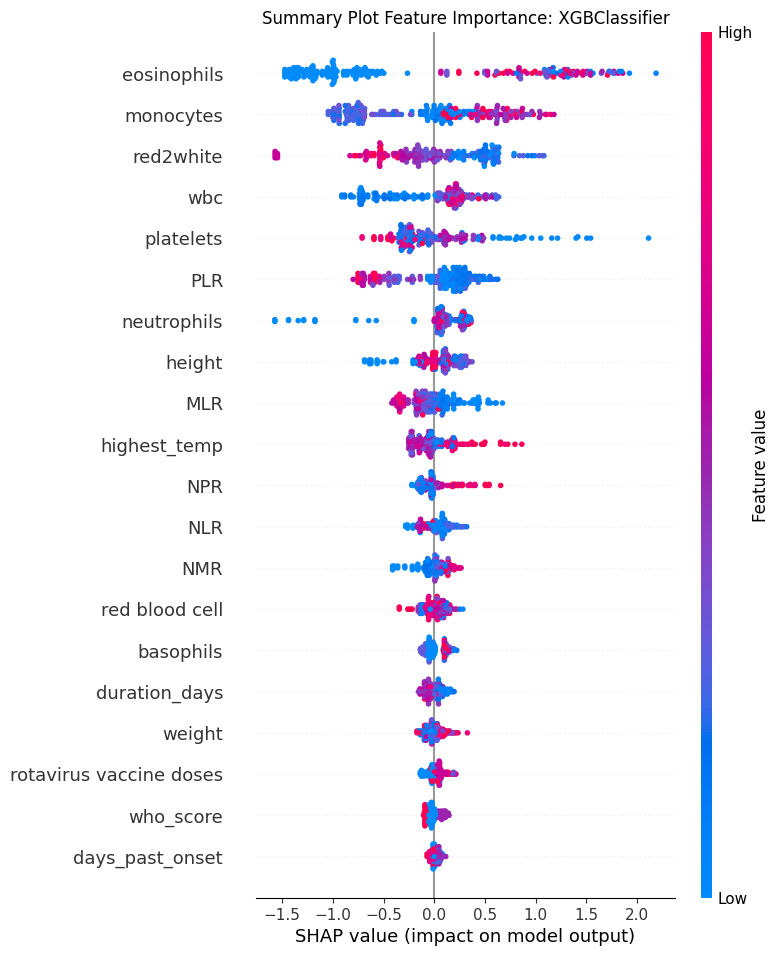

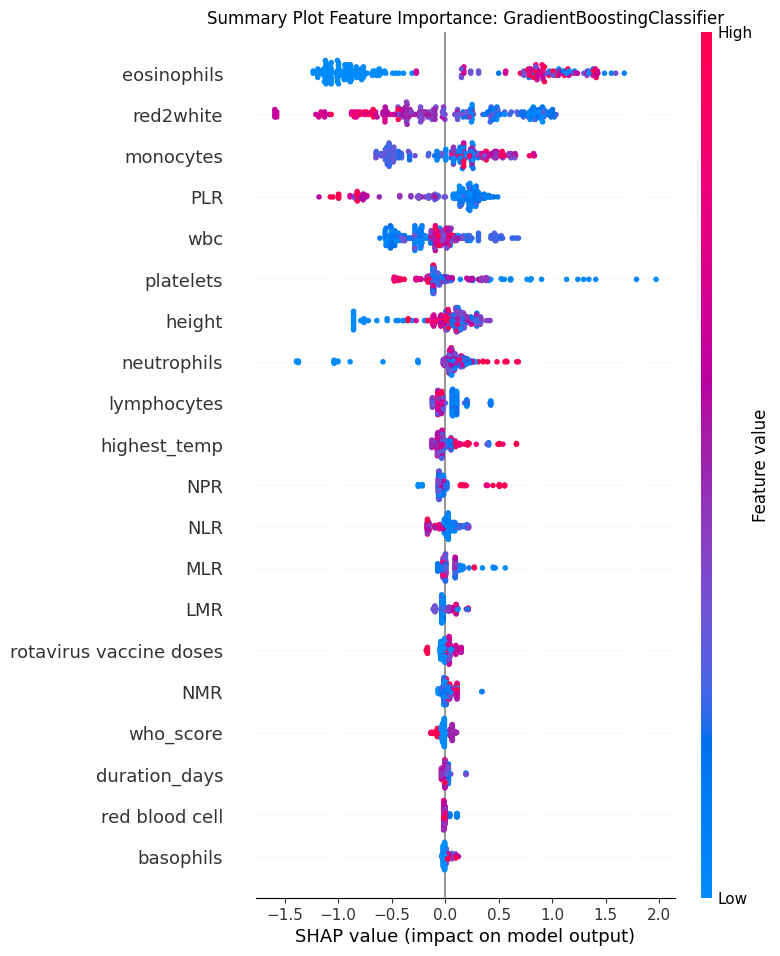

In [80]:
def summary_plot_feature_importance(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    # summary plot
    shap.summary_plot(shap_values, X, show=False)
    plt.title(f"Summary Plot Feature Importance: {model.__class__.__name__}")
    plt.savefig(f"../visualizations/feature_importance/{model.__class__.__name__}_summary_plot.png")
    plt.show()
    del explainer, shap_values, model

summary_plot_feature_importance(xg, X)
summary_plot_feature_importance(gb, X)

In [86]:
X.head()

,age,who_score,sex,height,weight,wbc,neutrophils,lymphocytes,monocytes,eosinophils,...,days_past_onset,rotavirus vaccine doses,NLR,PLR,MLR,NMR,NPR,LMR,red2white,age_group
0,-0.658388,-0.773223,-1.266165,-0.194956,-0.252905,1.852923,2.316029,-0.587023,0.088542,1.150635,...,-1.086105,0.735288,0.915705,-0.072387,0.304237,0.248506,2.185774,-0.415665,-1.274072,-0.915598
1,-0.156953,-0.773223,0.789786,-0.056446,0.066163,2.223343,1.138644,1.057754,5.007746,0.393616,...,1.379241,-0.164617,-0.382371,-0.673648,0.731339,-0.377274,0.649769,-0.465384,-1.613777,0.407381
2,-0.156953,2.044746,-1.266165,-0.148786,-0.805137,0.140880,0.451836,-0.364002,-0.306047,0.049517,...,0.146568,-1.064521,-0.089953,0.203380,-0.339457,0.013159,-0.226295,-0.245263,-0.384341,0.407381
3,-0.909105,-0.773223,0.789786,-1.072185,-0.780594,0.588702,0.017948,0.991545,0.180612,0.600076,...,-1.086105,-1.064521,-0.524866,-0.639869,-0.686353,-0.221747,-0.237553,0.030872,-0.911597,-0.915598
4,-0.700174,-0.773223,0.789786,-0.610485,-0.535157,1.016252,0.462738,0.869581,0.614660,1.632374,...,-0.469769,-1.064521,-0.449618,-0.433955,-0.518873,-0.215192,-0.335858,-0.138628,-0.867152,-0.915598


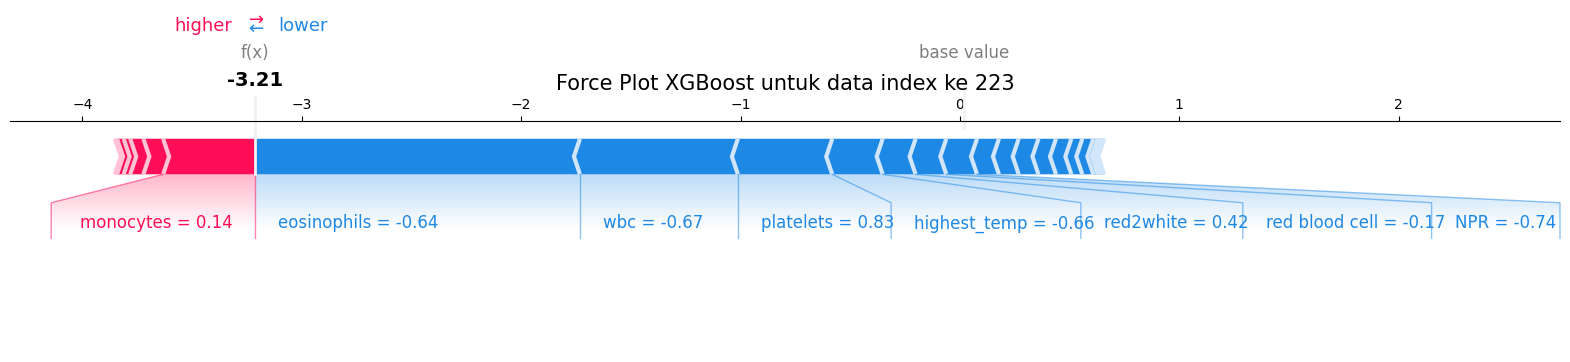

In [85]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, 
                np.round(shap_values[-1, :], 2), 
                np.round(X.iloc[-1, :],2), 
                show=False, matplotlib=True)

ax = plt.gca()
ax.set_title("Force Plot XGBoost untuk data index ke 223", fontsize=15)
plt.show()

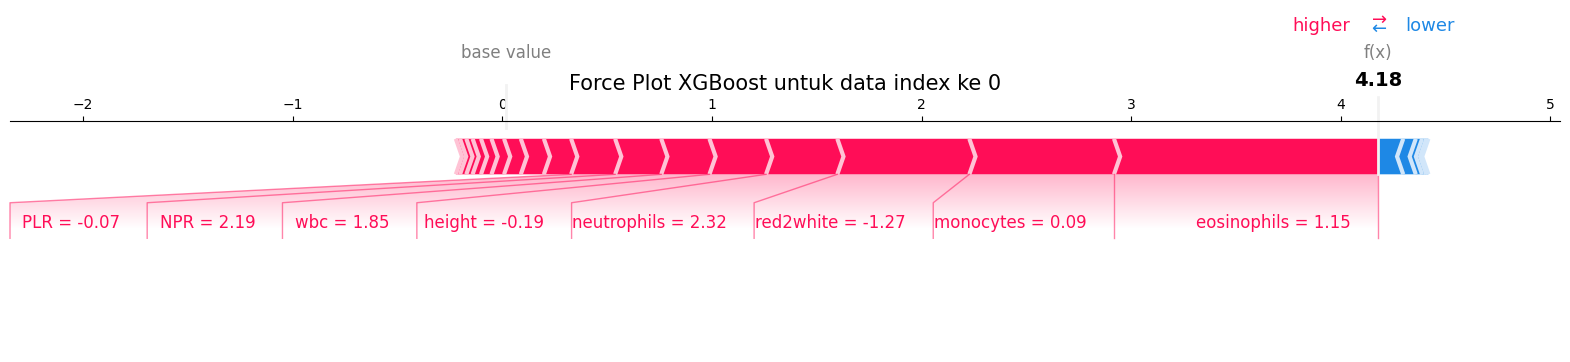

In [87]:
shap.force_plot(explainer.expected_value, 
                np.round(shap_values[0, :], 2), 
                np.round(X.iloc[0, :],2), 
                show=False, matplotlib=True)

ax = plt.gca()
ax.set_title("Force Plot XGBoost untuk data index ke 0", fontsize=15)
plt.show()

In [88]:
f = shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X.iloc[:1000, :],show=False
)
shap.save_html("force_plot_all.html", f)

In [93]:
data.head()

,infection_group,"age, months",who_score,sex,"height, m","weight, kg","wbc, 10^6/L","neutrophils, 10^6/L","lymphocytes, 10^6/L","monocytes, 10^6/L",...,days_past_onset,rotavirus vaccine doses,NLR,PLR,MLR,NMR,NPR,LMR,red2white,age_group
0,1,12,1,0,0.81,10.3,21890,17380,2070,1160,...,1.0,2,8.396135,132.367150,0.560386,14.982759,0.063431,1.784483,0.000186,1
1,1,24,1,1,0.84,12.9,23900,11980,6790,4900,...,5.0,1,1.764359,50.073638,0.721649,2.444898,0.035235,1.385714,0.000125,3
2,1,24,3,0,0.82,5.8,12600,8830,2710,860,...,3.0,0,3.258303,170.110701,0.317343,10.267442,0.019154,3.151163,0.000345,3
3,1,6,1,1,0.62,6.0,15030,6840,6600,1230,...,1.0,0,1.036364,54.696970,0.186364,5.560976,0.018947,5.365854,0.000251,1
4,1,11,1,1,0.72,8.0,17350,8880,6250,1560,...,2.0,0,1.420800,82.880000,0.249600,5.692308,0.017143,4.006410,0.000259,1


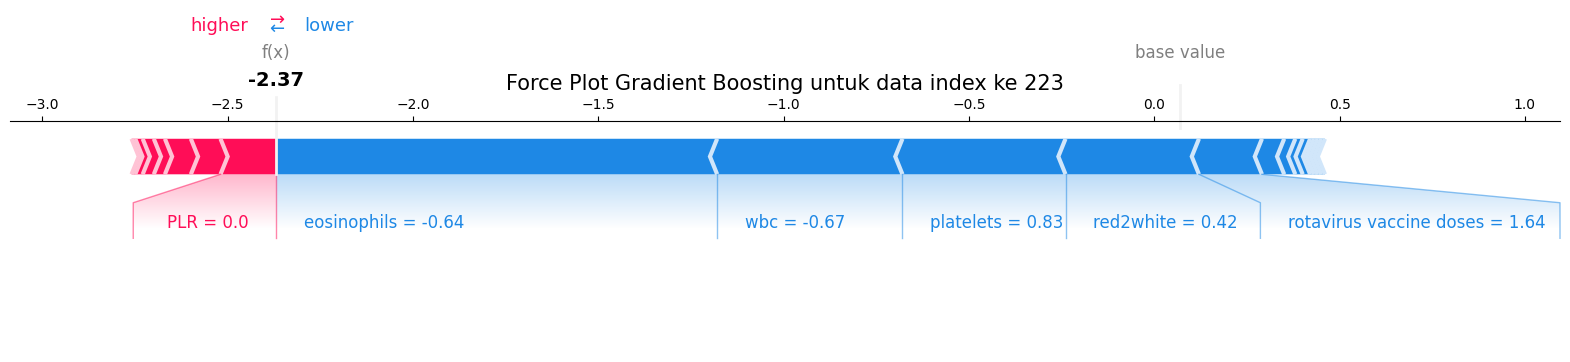

In [90]:
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, 
                np.round(shap_values[-1, :], 2), 
                np.round(X.iloc[-1, :],2), 
                show=False, matplotlib=True)

ax = plt.gca()
ax.set_title("Force Plot Gradient Boosting untuk data index ke 223", fontsize=15)
plt.show()

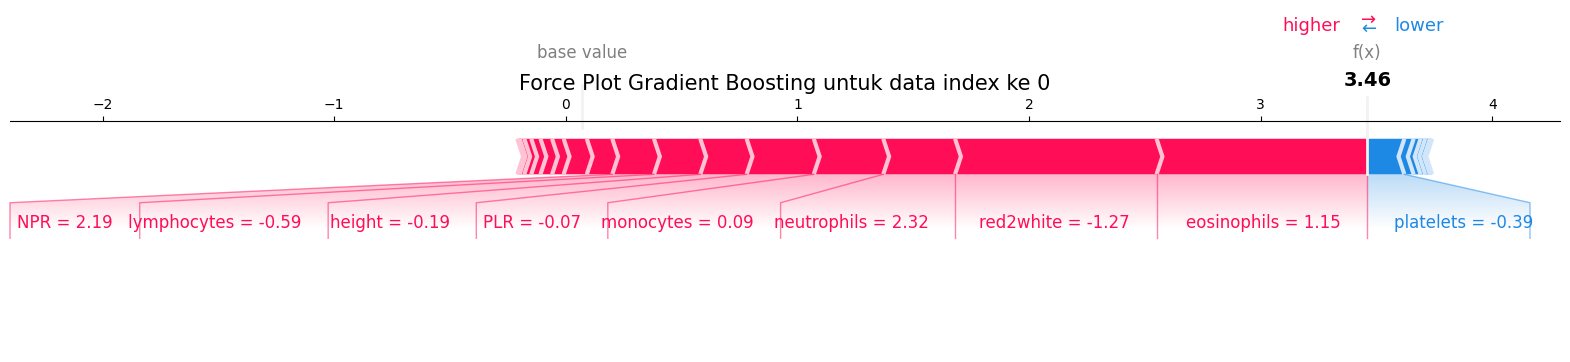

In [91]:
shap.force_plot(explainer.expected_value, 
                np.round(shap_values[0, :], 2), 
                np.round(X.iloc[0, :],2), 
                show=False, matplotlib=True)

ax = plt.gca()
ax.set_title("Force Plot Gradient Boosting untuk data index ke 0", fontsize=15)
plt.show()

In [92]:
f = shap.force_plot(
    explainer.expected_value, shap_values[:1000, :], X.iloc[:1000, :],show=False
)
shap.save_html("force_plot_all_Gradient Boosting.html", f)